In [1]:
# s = b-a / max(a,b) (Silhoutte coefficient)
# a -> The mean distance between a sample and all other points in the same cluster
# b -> The mean distance between a sample and all other points in the next nearest cluster

In [2]:
import pandas as pd
dataset = pd.read_csv("Live.csv")
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [3]:
dataset.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7049,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,n_init=10)

In [5]:
model.fit(dataset)

KMeans(n_clusters=3, n_init=10)

In [6]:
labels = model.predict(dataset)

In [7]:
import numpy as np
np.unique(labels, return_counts = True)

(array([0, 1, 2]), array([2334, 4288,  428], dtype=int64))

In [8]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [9]:
silhouettes = []
ks = list(range(2, 12))

In [10]:
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print('For n_clusters={}, The Silhoutte Coefficient is {}'.format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

For n_clusters=2, The Silhoutte Coefficient is 0.8188237721696822
For n_clusters=3, The Silhoutte Coefficient is 0.8972493682244883
For n_clusters=4, The Silhoutte Coefficient is 0.9106664962327088
For n_clusters=5, The Silhoutte Coefficient is 0.8866768371183754
For n_clusters=6, The Silhoutte Coefficient is 0.8430118288915796
For n_clusters=7, The Silhoutte Coefficient is 0.8419421782294257
For n_clusters=8, The Silhoutte Coefficient is 0.8369757672176514
For n_clusters=9, The Silhoutte Coefficient is 0.7602318505784276
For n_clusters=10, The Silhoutte Coefficient is 0.6919464768113225
For n_clusters=11, The Silhoutte Coefficient is 0.7198485434739268


Text(0, 0.5, 'Silhouette score')

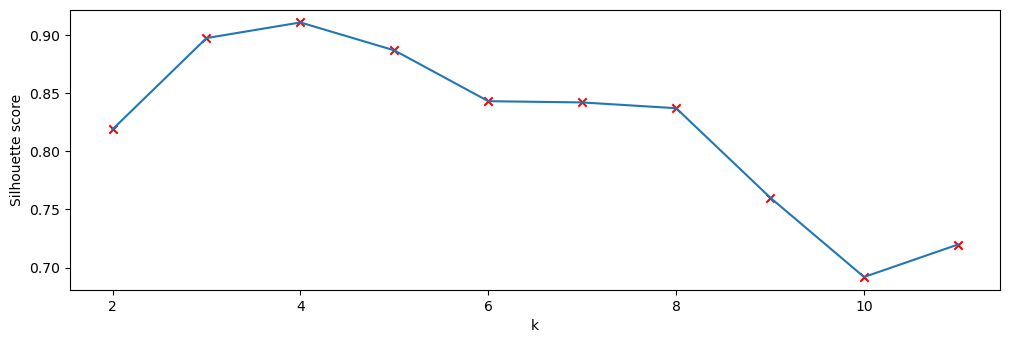

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, n_init=10)
model.fit(dataset)
labels = model.predict(dataset)
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([2334, 4288,  365,   63], dtype=int64))

In [13]:
dataset['labels'] = labels
dataset['labels'].value_counts()

1    4288
0    2334
2     365
3      63
Name: labels, dtype: int64

In [14]:
#----------------------------------

In [15]:
group_zero = dataset[dataset['labels'] == 0]['num_comments'].mean()
group_zero

0.030608773182480054

In [16]:
group_one = dataset[dataset['labels'] == 1]['num_comments'].mean()
group_one

0.0007619566531325948

In [17]:
group_two = dataset[dataset['labels'] == 2]['num_comments'].mean()
group_two

0.0017264581307471548

In [18]:
group_three = dataset[dataset['labels'] == 3]['num_comments'].mean()
group_three

0.00027148226290672723

In [19]:
#------------------------------

In [20]:
group_zero = dataset[dataset['labels'] == 0]['num_shares'].mean()
group_zero

0.033785031713235436

In [21]:
group_one = dataset[dataset['labels'] == 1]['num_shares'].mean()
group_one

0.0007458736181824375

In [22]:
group_two = dataset[dataset['labels'] == 2]['num_shares'].mean()
group_two

0.0007473434899500528

In [23]:
group_three = dataset[dataset['labels'] == 3]['num_shares'].mean()
group_three

0.001284119566829822

In [24]:
status_type = dataset[['status_type_photo', 'status_type_video', 'status_type_status']].idxmax(axis=1)
dataset = pd.concat([dataset['labels'], status_type.rename('status_type')], axis=1)

In [25]:
dataset.groupby(['labels', 'status_type',])['status_type'].count()

labels  status_type       
0       status_type_video     2334
1       status_type_photo     4288
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64